In [1]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report


In [2]:
data = pd.read_csv('data_15m_actual.csv')


data['Trend'] = data.apply(lambda row: 'Bullish' if row['close'] > row['open'] 
                        else 'Bearish' if row['close'] < row['open'] 
                        else 'Neutral', axis=1)

data['Trend']  = data['Trend'].map({'Bullish': 2, 'Bearish': 0, 'Neutral': 1})
data

,Unnamed: 0,datetime,open,high,low,close,volume,Trend
0,0,2019-09-08 17:45:00,10000.0,10000.0,10000.0,10000.0,0.002,1
1,1,2019-09-08 18:00:00,10000.0,10000.0,10000.0,10000.0,0.000,1
2,2,2019-09-08 18:15:00,10000.0,10000.0,10000.0,10000.0,0.000,1
3,3,2019-09-08 18:30:00,10000.0,10000.0,10000.0,10000.0,0.000,1
4,4,2019-09-08 18:45:00,10000.0,10000.0,10000.0,10000.0,0.000,1
...,...,...,...,...,...,...,...,...
151221,151221,2023-12-31 23:00:00,42294.8,42380.1,42211.0,42262.4,4241.827,0
151222,151222,2023-12-31 23:15:00,42262.5,42274.8,42083.1,42211.2,4519.049,0
151223,151223,2023-12-31 23:30:00,42211.3,42276.6,42180.8,42276.5,1724.792,2
151224,151224,2023-12-31 23:45:00,42276.5,42315.6,42250.4,42314.0,1190.797,2


In [3]:
data = data.drop(columns='Unnamed: 0')
data['datetime'] = pd.to_datetime(data['datetime'])
data['Year'] = data['datetime'].dt.year
data['Month'] = data['datetime'].dt.month
data['Day'] = data['datetime'].dt.day
data['Hour'] = data['datetime'].dt.hour
data['Minute'] = data['datetime'].dt.minute
data = data.drop(columns='datetime')


In [4]:
data

,open,high,low,close,volume,Trend,Year,Month,Day,Hour,Minute
0,10000.0,10000.0,10000.0,10000.0,0.002,1,2019,9,8,17,45
1,10000.0,10000.0,10000.0,10000.0,0.000,1,2019,9,8,18,0
2,10000.0,10000.0,10000.0,10000.0,0.000,1,2019,9,8,18,15
3,10000.0,10000.0,10000.0,10000.0,0.000,1,2019,9,8,18,30
4,10000.0,10000.0,10000.0,10000.0,0.000,1,2019,9,8,18,45
...,...,...,...,...,...,...,...,...,...,...,...
151221,42294.8,42380.1,42211.0,42262.4,4241.827,0,2023,12,31,23,0
151222,42262.5,42274.8,42083.1,42211.2,4519.049,0,2023,12,31,23,15
151223,42211.3,42276.6,42180.8,42276.5,1724.792,2,2023,12,31,23,30
151224,42276.5,42315.6,42250.4,42314.0,1190.797,2,2023,12,31,23,45


In [6]:
data

,open,high,low,close,volume,Trend,Year,Month,Day,Hour,Minute
0,10000.0,10000.0,10000.0,10000.0,0.002,1,2019,9,8,17,45
1,10000.0,10000.0,10000.0,10000.0,0.000,1,2019,9,8,18,0
2,10000.0,10000.0,10000.0,10000.0,0.000,1,2019,9,8,18,15
3,10000.0,10000.0,10000.0,10000.0,0.000,1,2019,9,8,18,30
4,10000.0,10000.0,10000.0,10000.0,0.000,1,2019,9,8,18,45
...,...,...,...,...,...,...,...,...,...,...,...
151221,42294.8,42380.1,42211.0,42262.4,4241.827,0,2023,12,31,23,0
151222,42262.5,42274.8,42083.1,42211.2,4519.049,0,2023,12,31,23,15
151223,42211.3,42276.6,42180.8,42276.5,1724.792,2,2023,12,31,23,30
151224,42276.5,42315.6,42250.4,42314.0,1190.797,2,2023,12,31,23,45


In [7]:
y = data['Trend']
X = data.drop('Trend', axis = 1)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2 ,random_state=4)


In [9]:
X_test = X_test[1:]
y_test = y_test[1:]

In [10]:
print(len(X_train), len(X_test)) 
print(len(y_train), len(y_test))

30245 120980
30245 120980


In [13]:
model = XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    enable_categorical=False  
)

# Train the model
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

In [14]:
predictions = model.predict(X_test)

In [15]:
acc = sum(1 for x,y in zip(predictions, y_test) if x == y) / len(y_test)

In [38]:
from sklearn.metrics import mean_absolute_error,r2_score

mse = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

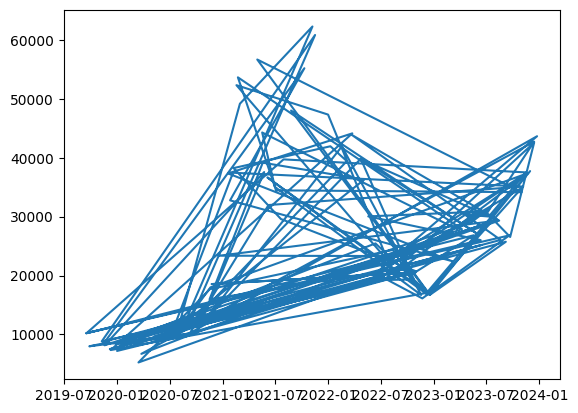

In [17]:
a = X_test['close'][::1000]
X_test['Date'] = pd.to_datetime(X_test[['Year', 'Month', 'Day']])
b = X_test['Date'][::1000]


import matplotlib.pyplot as plt
plt.plot(b, a)

In [16]:
X_2023 = pd.read_csv('/Users/anuragprasad/Documents/btc_eth/data_hr_23.csv')
y_23_pred = model.predict(X_2023)

In [17]:
y_23_pred.tolist()

[0,
 2,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 0,
 2,
 2,
 0,
 2,
 0,
 2,
 0,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


In [18]:
X_2023['Trend'] = y_23_pred

In [19]:
X_2023

,open,high,low,close,volume,Year,Month,Day,Hour,Minute,Trend
0,16537.5,16540.9,16504.0,16527.0,5381.399,2023,1,1,0,0,0
1,16527.1,16554.3,16524.1,16550.4,3210.826,2023,1,1,1,0,2
2,16550.5,16557.1,16534.8,16542.4,2399.668,2023,1,1,2,0,2
3,16542.5,16542.5,16515.0,16529.3,3214.480,2023,1,1,3,0,2
4,16529.2,16530.4,16508.8,16517.8,3150.954,2023,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...
8755,42701.7,42741.9,42624.7,42659.9,3944.096,2023,12,31,19,0,0
8756,42659.9,42724.5,42543.3,42599.1,4730.936,2023,12,31,20,0,2
8757,42599.2,42717.0,42558.2,42558.9,3794.010,2023,12,31,21,0,2
8758,42559.0,42629.5,42111.9,42294.8,11952.346,2023,12,31,22,0,0


In [21]:
X_2023 = X_2023.drop("Minute", axis =1)

In [58]:
X_2023

,open,high,low,close,volume,Trend,date,regime,col
0,16537.5,16540.9,16504.0,16527.0,5381.399,0,2023-01-01,bearish,"(0, 1, 0)"
1,16527.1,16554.3,16524.1,16550.4,3210.826,2,2023-01-01,bullish,"(1, 0, 0)"
2,16550.5,16557.1,16534.8,16542.4,2399.668,2,2023-01-01,bullish,"(1, 0, 0)"
3,16542.5,16542.5,16515.0,16529.3,3214.480,2,2023-01-01,bullish,"(1, 0, 0)"
4,16529.2,16530.4,16508.8,16517.8,3150.954,0,2023-01-01,bearish,"(0, 1, 0)"
...,...,...,...,...,...,...,...,...,...
8755,42701.7,42741.9,42624.7,42659.9,3944.096,0,2023-12-01,bearish,"(0, 1, 0)"
8756,42659.9,42724.5,42543.3,42599.1,4730.936,2,2023-12-01,bullish,"(1, 0, 0)"
8757,42599.2,42717.0,42558.2,42558.9,3794.010,2,2023-12-01,bullish,"(1, 0, 0)"
8758,42559.0,42629.5,42111.9,42294.8,11952.346,0,2023-12-01,bearish,"(0, 1, 0)"


In [23]:
X_2023['date'] = pd.to_datetime(X_2023[['Year', 'Month']].assign(day=1))


In [24]:
X_2023 = X_2023.drop(columns=['Year', 'Month', 'Day', 'Hour'])

In [50]:
X_2023

,open,high,low,close,volume,Trend,date,regime,col
0,16537.5,16540.9,16504.0,16527.0,5381.399,0,2023-01-01,bearish,"(0, 1, 0)"
1,16527.1,16554.3,16524.1,16550.4,3210.826,2,2023-01-01,bullish,"(1, 0, 0)"
2,16550.5,16557.1,16534.8,16542.4,2399.668,2,2023-01-01,bullish,"(1, 0, 0)"
3,16542.5,16542.5,16515.0,16529.3,3214.480,2,2023-01-01,bullish,"(1, 0, 0)"
4,16529.2,16530.4,16508.8,16517.8,3150.954,0,2023-01-01,bearish,"(0, 1, 0)"
...,...,...,...,...,...,...,...,...,...
8755,42701.7,42741.9,42624.7,42659.9,3944.096,0,2023-12-01,bearish,"(0, 1, 0)"
8756,42659.9,42724.5,42543.3,42599.1,4730.936,2,2023-12-01,bullish,"(1, 0, 0)"
8757,42599.2,42717.0,42558.2,42558.9,3794.010,2,2023-12-01,bullish,"(1, 0, 0)"
8758,42559.0,42629.5,42111.9,42294.8,11952.346,0,2023-12-01,bearish,"(0, 1, 0)"


<Axes: >

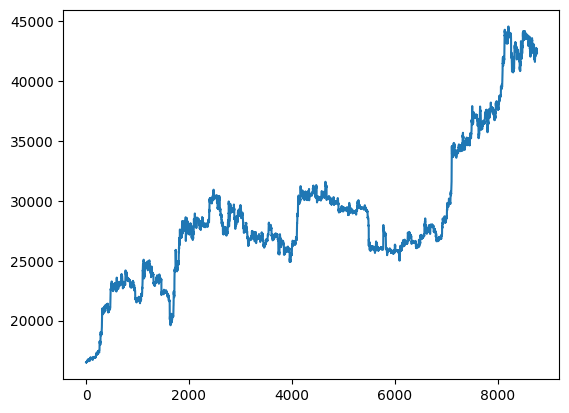

In [61]:
X_2023['close'].plot()

In [62]:
def plot_close_by_regime(data, start_date=None, end_date=None):
    """Plots the 'close' column with colors changing dynamically based on the 'regime' column and adds a legend."""

    if start_date or end_date:
        data = data.loc[start_date:end_date]

    plt.figure(figsize=(14, 7))

    # Convert regime into color mapping
    color_map = {'bullish': 'green', 'bearish': 'red', 'neutral': 'blue'}

    # Iterate through consecutive segments where regime is the same
    prev_index = 0
    prev_regime = data['regime'].iloc[0]

    for i in range(1, len(data)):
        if data['regime'].iloc[i] != prev_regime:
            plt.plot(data['date'].iloc[prev_index:i],
                     data['close'].iloc[prev_index:i],
                     color=color_map[prev_regime], label=prev_regime if prev_regime not in plt.gca().get_legend_handles_labels()[1] else None)
            prev_index = i
            prev_regime = data['regime'].iloc[i]

    # Plot the last segment
    plt.plot(data['date'].iloc[prev_index:],
             data['close'].iloc[prev_index:],
             color=color_map[prev_regime], label=prev_regime if prev_regime not in plt.gca().get_legend_handles_labels()[1] else None)

    # Add a legend
    plt.legend(title='Regime', loc='upper right')

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Close Price with Regime Classification')
    plt.grid(True)
    plt.show()


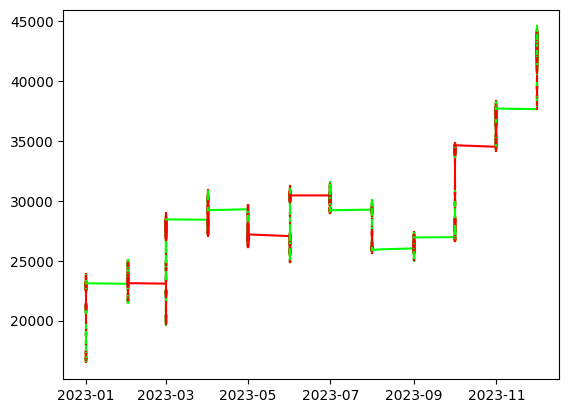

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure the color_map maps 'bullish', 'bearish', 'neutral' to valid RGB tuples
color_map = {'bullish': (1, 0, 0), 'bearish': (0, 1, 0), 'neutral': (0, 0, 1)}

# Map the 'regime' column to colors
X_2023['col'] = X_2023['regime'].map(color_map)

# Plot each segment individually
for i in range(1, len(X_2023)):
    plt.plot(X_2023['date'].iloc[i-1:i+1], X_2023['close'].iloc[i-1:i+1], color=X_2023['col'].iloc[i])

plt.show()


In [ ]:
X_2023.set_index('date', inplace=True)

,open,high,low,close,volume,Trend,date,regime,col
0,16537.5,16540.9,16504.0,16527.0,5381.399,0,2023-01-01,bearish,"(0, 1, 0)"
1,16527.1,16554.3,16524.1,16550.4,3210.826,2,2023-01-01,bullish,"(1, 0, 0)"
2,16550.5,16557.1,16534.8,16542.4,2399.668,2,2023-01-01,bullish,"(1, 0, 0)"
3,16542.5,16542.5,16515.0,16529.3,3214.480,2,2023-01-01,bullish,"(1, 0, 0)"
4,16529.2,16530.4,16508.8,16517.8,3150.954,0,2023-01-01,bearish,"(0, 1, 0)"
...,...,...,...,...,...,...,...,...,...
8755,42701.7,42741.9,42624.7,42659.9,3944.096,0,2023-12-01,bearish,"(0, 1, 0)"
8756,42659.9,42724.5,42543.3,42599.1,4730.936,2,2023-12-01,bullish,"(1, 0, 0)"
8757,42599.2,42717.0,42558.2,42558.9,3794.010,2,2023-12-01,bullish,"(1, 0, 0)"
8758,42559.0,42629.5,42111.9,42294.8,11952.346,0,2023-12-01,bearish,"(0, 1, 0)"


ValueError: 0       (0, 1, 0)
1       (1, 0, 0)
2       (1, 0, 0)
3       (1, 0, 0)
4       (0, 1, 0)
          ...    
8755    (0, 1, 0)
8756    (1, 0, 0)
8757    (1, 0, 0)
8758    (0, 1, 0)
8759    (1, 0, 0)
Name: col, Length: 8760, dtype: object is not a valid value for color: supported inputs are (r, g, b) and (r, g, b, a) 0-1 float tuples; '#rrggbb', '#rrggbbaa', '#rgb', '#rgba' strings; named color strings; string reprs of 0-1 floats for grayscale values; 'C0', 'C1', ... strings for colors of the color cycle; and pairs combining one of the above with an alpha value

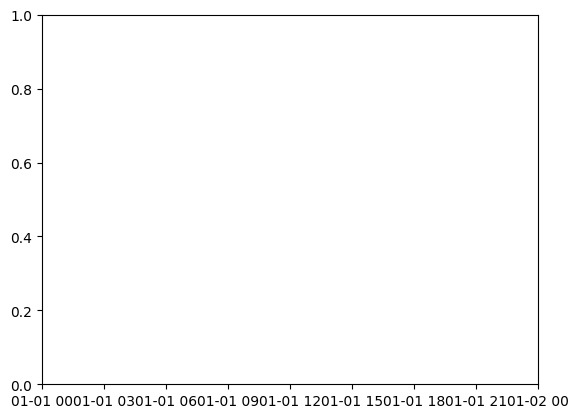

In [57]:
plt.plot(X_2023['date'], X_2023['close'], c = X_2023['col'])

In [36]:
X_2023

,open,high,low,close,volume,Trend,date,regime,col
0,16537.5,16540.9,16504.0,16527.0,5381.399,0,2023-01-01,bearish,green
1,16527.1,16554.3,16524.1,16550.4,3210.826,2,2023-01-01,bullish,red
2,16550.5,16557.1,16534.8,16542.4,2399.668,2,2023-01-01,bullish,red
3,16542.5,16542.5,16515.0,16529.3,3214.480,2,2023-01-01,bullish,red
4,16529.2,16530.4,16508.8,16517.8,3150.954,0,2023-01-01,bearish,green
...,...,...,...,...,...,...,...,...,...
8755,42701.7,42741.9,42624.7,42659.9,3944.096,0,2023-12-01,bearish,green
8756,42659.9,42724.5,42543.3,42599.1,4730.936,2,2023-12-01,bullish,red
8757,42599.2,42717.0,42558.2,42558.9,3794.010,2,2023-12-01,bullish,red
8758,42559.0,42629.5,42111.9,42294.8,11952.346,0,2023-12-01,bearish,green


<Axes: >

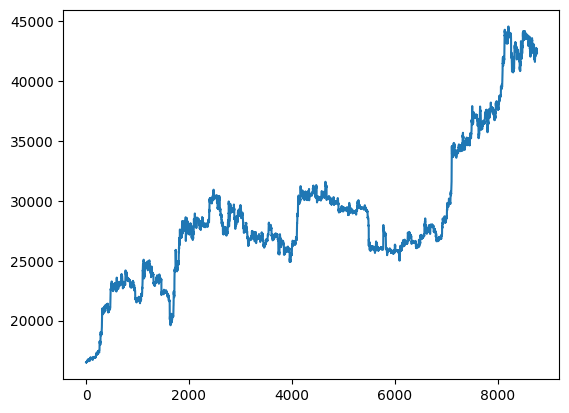

In [32]:
X_2023['close'].plot()

In [26]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [27]:
trend_to_regime = {0: 'bearish', 1: 'neutral', 2: 'bullish'}
X_2023['regime'] = X_2023['Trend'].map(trend_to_regime)


In [28]:
X_2023

,open,high,low,close,volume,Trend,date,regime
0,16537.5,16540.9,16504.0,16527.0,5381.399,0,2023-01-01,bearish
1,16527.1,16554.3,16524.1,16550.4,3210.826,2,2023-01-01,bullish
2,16550.5,16557.1,16534.8,16542.4,2399.668,2,2023-01-01,bullish
3,16542.5,16542.5,16515.0,16529.3,3214.480,2,2023-01-01,bullish
4,16529.2,16530.4,16508.8,16517.8,3150.954,0,2023-01-01,bearish
...,...,...,...,...,...,...,...,...
8755,42701.7,42741.9,42624.7,42659.9,3944.096,0,2023-12-01,bearish
8756,42659.9,42724.5,42543.3,42599.1,4730.936,2,2023-12-01,bullish
8757,42599.2,42717.0,42558.2,42558.9,3794.010,2,2023-12-01,bullish
8758,42559.0,42629.5,42111.9,42294.8,11952.346,0,2023-12-01,bearish


In [30]:
def plot_close_by_regime(data, start_date=None, end_date=None):
    """Plots the 'close' column with colors changing dynamically based on the 'regime' column and adds a legend."""

    if start_date or end_date:
        data = data.loc[start_date:end_date]

    plt.figure(figsize=(14, 7))

    # Convert regime into color mapping
    color_map = {'bullish': 'green', 'bearish': 'red', 'neutral': 'blue'}

    # Iterate through consecutive segments where regime is the same
    prev_index = 0
    prev_regime = data['regime'].iloc[0]

    for i in range(1, len(data)):
        if data['regime'].iloc[i] != prev_regime:
            plt.plot(data['date'].iloc[prev_index:i],
                     data['close'].iloc[prev_index:i],
                     color=color_map[prev_regime], label=prev_regime if prev_regime not in plt.gca().get_legend_handles_labels()[1] else None)
            prev_index = i
            prev_regime = data['regime'].iloc[i]

    # Plot the last segment
    plt.plot(data['date'].iloc[prev_index:],
             data['close'].iloc[prev_index:],
             color=color_map[prev_regime], label=prev_regime if prev_regime not in plt.gca().get_legend_handles_labels()[1] else None)

    # Add a legend
    plt.legend(title='Regime', loc='upper right')

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Close Price with Regime Classification')
    plt.grid(True)
    plt.show()

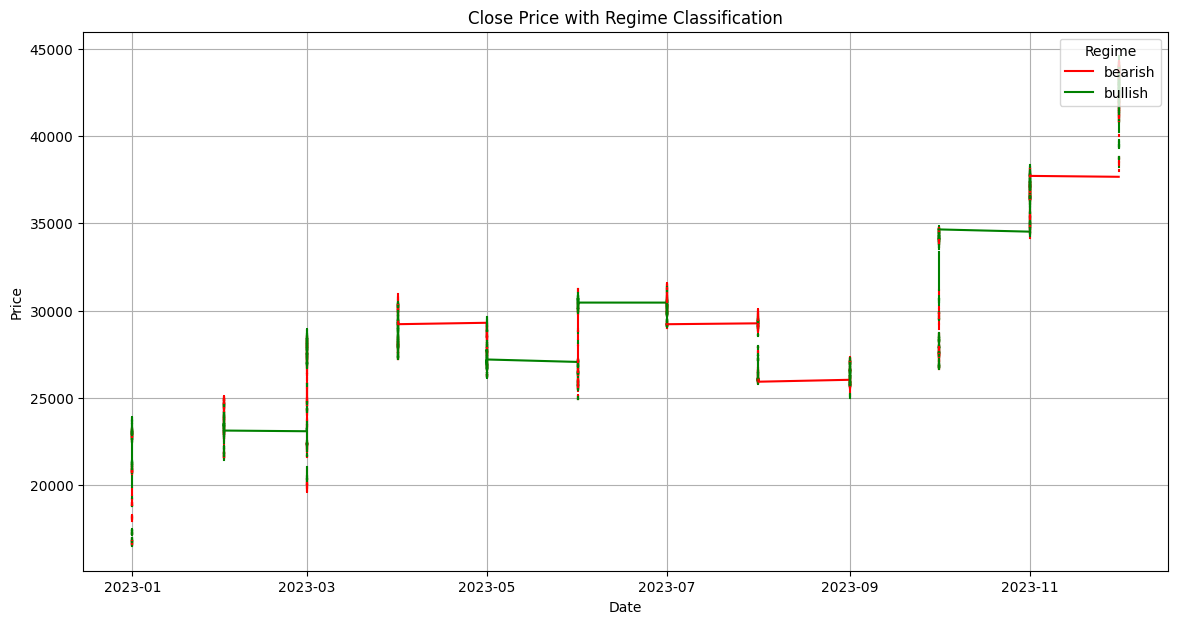

In [31]:
plot_close_by_regime(X_2023)